In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

Saving lenna.jpg.webp to lenna.jpg (1).webp


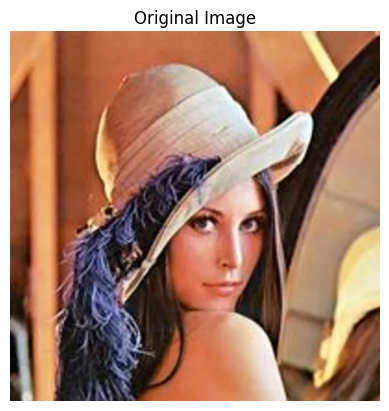

In [4]:
import numpy as np

uploaded = files.upload()

for filename in uploaded.keys():
  # Read image from bytes
  img_bytes = uploaded[filename]
  nparr = np.frombuffer(img_bytes, np.uint8)
  image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

  # Display the original image
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')
  plt.show()

In [2]:
def apply_image_negative(image):
  """Applies the image negative effect to an input image.

  Args:
    image: The input image (NumPy array).

  Returns:
    The image with the negative effect applied.
  """
  return 255 - image

In [5]:
negative_image = apply_image_negative(image)

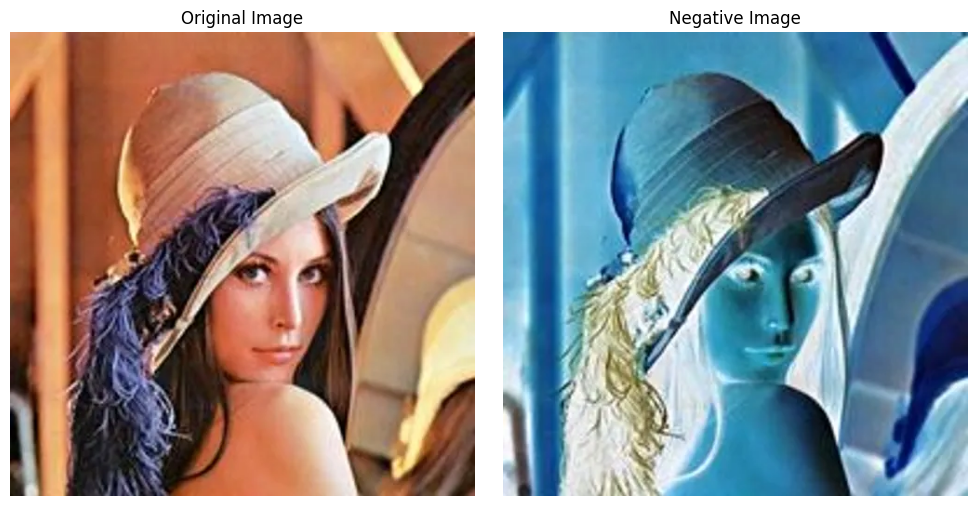

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Negative Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [7]:
def apply_log_transform(image, c=1):
  """Applies the log transform to an input image.

  Args:
    image: The input image (NumPy array).
    c: The constant value for the log transform. Defaults to 1.

  Returns:
    The image with the log transform applied.
  """
  # Convert to float for calculations
  image_float = np.float64(image)
  log_transformed_image = c * np.log(1 + image_float)

  # Scale the result to 0-255
  max_val = np.max(log_transformed_image)
  log_transformed_image = np.uint8(255 * (log_transformed_image / max_val))

  return log_transformed_image

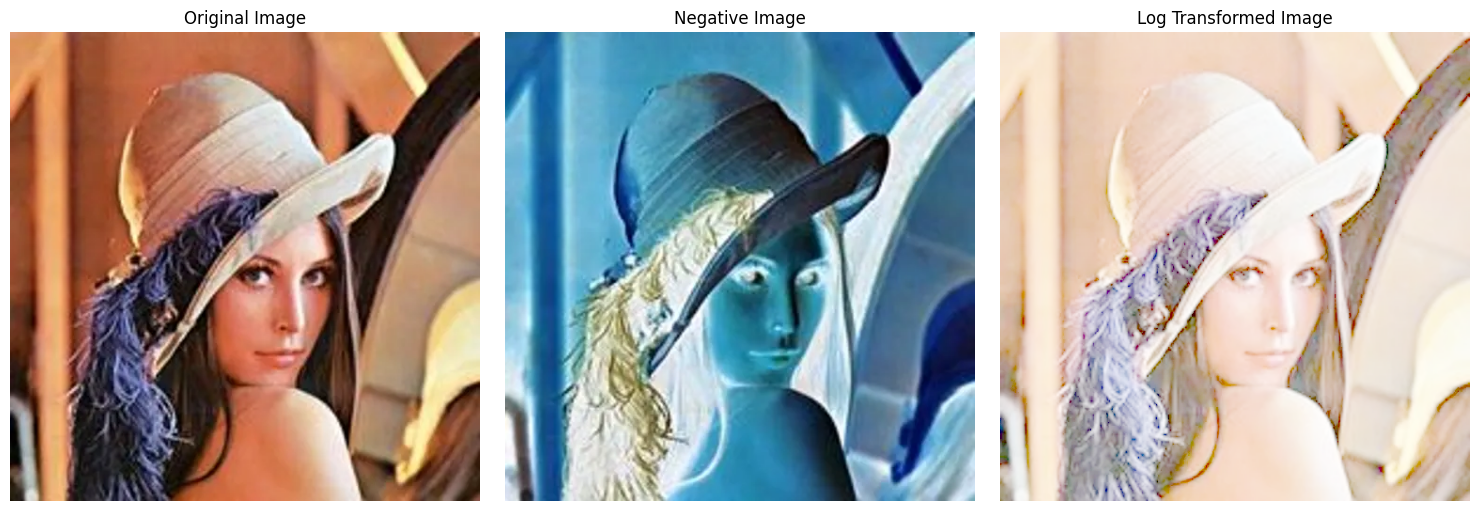

In [15]:
log_transformed_image = apply_log_transform(image)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Negative Image')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(log_transformed_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Log Transformed Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [13]:
def apply_power_law_transform(image, c=1, gamma=1):
  """Applies the power law transform to an input image.

  Args:
    image: The input image (NumPy array).
    c: The constant value for the power law transform. Defaults to 1.
    gamma: The gamma value for the power law transform. Defaults to 1.

  Returns:
    The image with the power law transform applied.
  """
  # Convert to float for calculations and normalize to 0-1
  image_float = np.float64(image) / 255.0
  power_law_transformed_image = c * np.power(image_float, gamma)

  # Scale the result back to 0-255
  power_law_transformed_image = np.uint8(power_law_transformed_image * 255)

  return power_law_transformed_image

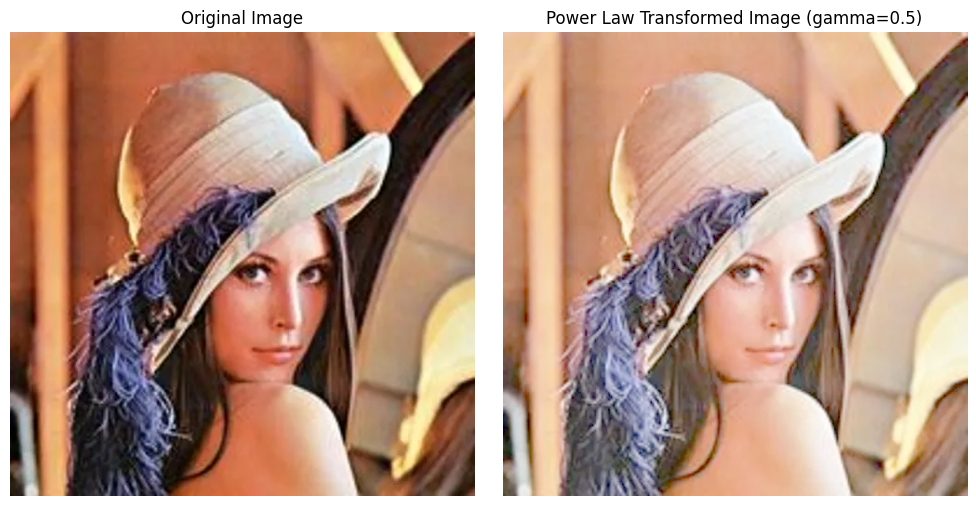

In [23]:
power_law_transformed_image = apply_power_law_transform(image, gamma=0.5) # Example with gamma = 0.5

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')


axes[1].imshow(cv2.cvtColor(power_law_transformed_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Power Law Transformed Image (gamma=0.5)')
axes[1].axis('off')


plt.tight_layout()
plt.show()

In [16]:
def apply_contrast_stretching(image, r1, s1, r2, s2):
    """Applies contrast stretching to an input image.

    Args:
        image: The input image (NumPy array).
        r1: The input intensity value below which mapping starts.
        s1: The output intensity value corresponding to r1.
        r2: The input intensity value above which mapping ends.
        s2: The output intensity value corresponding to r2.

    Returns:
        The image with contrast stretching applied.
    """
    # Convert to float for calculations
    image_float = np.float64(image)
    stretched_image = np.zeros_like(image_float)

    # Apply piecewise linear transformation
    stretched_image = np.where(image_float < r1,
                               image_float * (s1 / r1),
                               stretched_image)

    stretched_image = np.where((image_float >= r1) & (image_float <= r2),
                               ((image_float - r1) * (s2 - s1) / (r2 - r1)) + s1,
                               stretched_image)

    stretched_image = np.where(image_float > r2,
                               ((image_float - r2) * (255 - s2) / (255 - r2)) + s2,
                               stretched_image)


    # Scale the result back to 0-255 and convert to uint8
    stretched_image = np.uint8(np.clip(stretched_image, 0, 255))

    return stretched_image

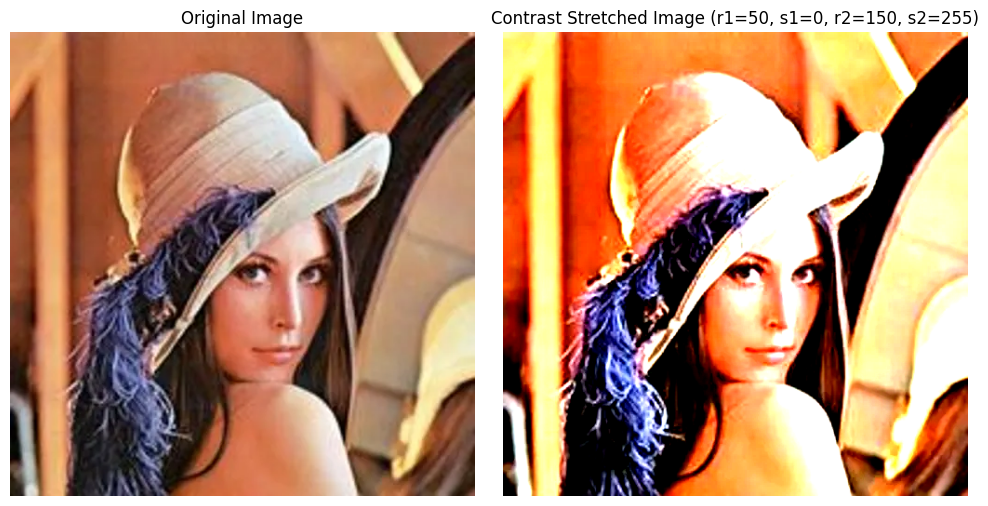

In [24]:
# Example usage of contrast stretching with some values for r1, s1, r2, and s2
# You might need to adjust these values based on the specific image
r1, s1, r2, s2 = 50, 0, 150, 255
contrast_stretched_image = apply_contrast_stretching(image, r1, s1, r2, s2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')



axes[1].imshow(cv2.cvtColor(contrast_stretched_image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Contrast Stretched Image (r1={r1}, s1={s1}, r2={r2}, s2={s2})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [25]:
def apply_histogram_equalization(image):
  """Applies histogram equalization to an a grayscale image.

  Args:
    image: The input grayscale image (NumPy array).

  Returns:
    The image with histogram equalization applied.
  """
  # Check if image is grayscale
  if len(image.shape) == 3 and image.shape[2] == 3:
    # Convert to grayscale if not already
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  else:
    gray_image = image

  equalized_image = cv2.equalizeHist(gray_image)

  return equalized_image

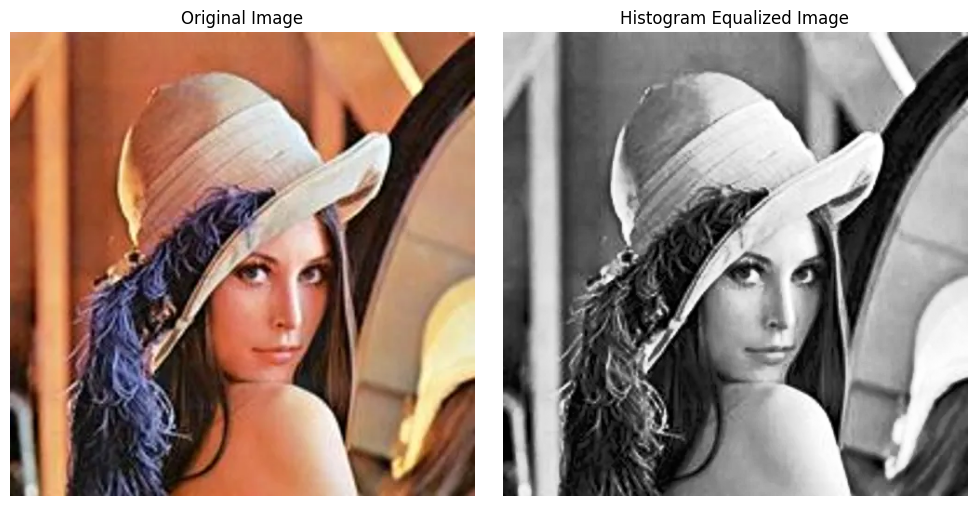

In [27]:
# Apply histogram equalization (Note: Histogram equalization is typically applied to grayscale images)
equalized_image = apply_histogram_equalization(image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')



axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('Histogram Equalized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()